## Notebook 3 : Real Estate Insights: Proximity to Train Stations

## 1 - Dataset Cleaning, Preparation and Exploration


In [1]:
#### DATA CLEANING FOR TRAIN STATIONS ####

import pandas as pd

# Load train station data
stations_df = pd.read_csv("liste-des-gares.csv", sep=';')

# Select the important columns
important_columns = ['LIBELLE', 'COMMUNE', 'DEPARTEMENT', 'X_WGS84', 'Y_WGS84', 'FRET', 'VOYAGEURS']
stations_df = stations_df[important_columns]

# Rename columns
stations_df.rename(columns={
    'LIBELLE': 'Station_Name',
    'COMMUNE': 'Station_Town',
    'DEPARTEMENT': 'Department',
    'X_WGS84': 'Longitude',
    'Y_WGS84': 'Latitude'
}, inplace=True)

# Filter active stations
active_stations = stations_df[stations_df['VOYAGEURS'] == 'O']  # Keep only stations serving passengers

# Check for missing values and clean the data
active_stations = active_stations.dropna(subset=['Longitude', 'Latitude'])

# Save the cleaned file
active_stations.to_csv('cleaned-train-stations.csv', index=False)

active_stations.head()

,Station_Name,Station_Town,Department,Longitude,Latitude,FRET,VOYAGEURS
0,La Douzillère,JOUE-LES-TOURS,INDRE-ET-LOIRE,0.653001,47.338661,N,O
2,La Défense,PUTEAUX,HAUTS-DE-SEINE,2.238472,48.893437,N,O
3,Byans,BYANS-SUR-DOUBS,DOUBS,5.852088,47.118329,N,O
4,Chamelet,CHAMELET,RHONE,4.507016,45.981670,N,O
5,L'Hermitage-Mordelles,L'HERMITAGE,ILLE-ET-VILAINE,-1.819212,48.123336,O,O


In [2]:
#### EXPLORING PROPERTY VALUES ####

# File name for property value data
property_file = "df_complete.csv" 

# Load the property value dataset
df_property_values = pd.read_csv(property_file)  

# Display the first few rows of the dataset
df_property_values.head()

/var/folders/2j/m3j3kzvx7ldfkj1yxvd400vw0000gn/T/ipykernel_413/2322875434.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_property_values = pd.read_csv(property_file)


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [3]:
# File name for cleaned train station data
stations_file = "cleaned-train-stations.csv"  

# Load train station data
stations_df = pd.read_csv(stations_file)  

# Extract unique towns with train stations
towns_with_stations = stations_df["Station_Town"].unique()

# Add a column to indicate if the property is near a train station
df_property_values["Near_Station"] = df_property_values["Commune"].apply(lambda x: x in towns_with_stations)


## 2 - Price Per Square Meter Analysis and Visualization by Train Station Proximity

In [4]:
# Property Data Cleaning : We keep only rows where "Surface reelle bati" > 0
df_property_values = df_property_values[df_property_values["Surface reelle bati"] > 0]

# Create a new column `Price_per_m2`
df_property_values["Price_per_m2"] = df_property_values["Valeur fonciere"] / df_property_values["Surface reelle bati"]

# Calculate the average price per m² for properties near and far from train stations
average_price_near = df_property_values[df_property_values["Near_Station"]]["Price_per_m2"].mean()
average_price_far = df_property_values[~df_property_values["Near_Station"]]["Price_per_m2"].mean()

print(f"Average price per m² (near train stations): {average_price_near:.2f} €")
print(f"Average price per m² (far from train stations): {average_price_far:.2f} €")

Average price per m² (near train stations): 18263.00 €
Average price per m² (far from train stations): 13191.82 €


<Figure size 1000x600 with 0 Axes>

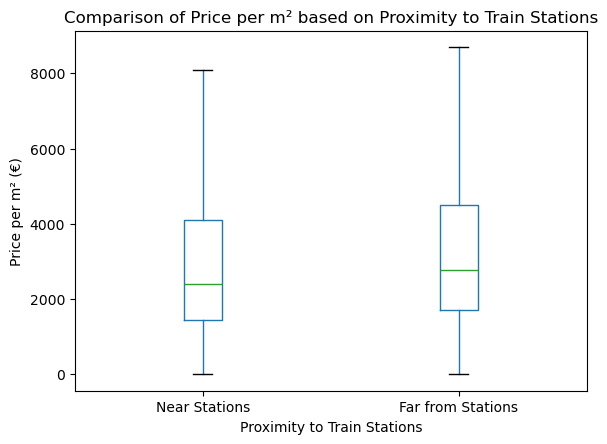

In [5]:
#### Visualization : Boxplot ####

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for price per m² by proximity to train stations
df_property_values.boxplot(column="Price_per_m2", by="Near_Station", grid=False, showfliers=False)

# Add titles and labels
plt.title("Comparison of Price per m² based on Proximity to Train Stations")
plt.suptitle("")  # Remove the default boxplot title
plt.xlabel("Proximity to Train Stations")
plt.ylabel("Price per m² (€)")
plt.xticks([1, 2], ["Near Stations", "Far from Stations"])

# Display the plot
plt.show()

This boxplot compares the price per square meter between properties near train stations and those further away. Land near train stations shows a slightly higher median price, likely due to better accessibility. However, proximity to train stations does not have a significant impact on the median price per square meter, which remains similar for both categories, around €2,000/m².

Investing in land near train stations can be an interesting strategy to leverage their attractiveness and the growing demand in well-connected areas. On the other hand, land farther from train stations offers a more affordable alternative, suitable for projects targeting specific audiences or quieter environments. Although proximity to train stations does not lead to a marked difference in the median price, it can provide advantages in terms of stability and demand driven by transportation infrastructure.

## 3 - Analyzing and Visualizing Property Type Distributions by Proximity to Train Stations

In [6]:
# Distribution of property types near and far from train stations
types_near_station = df_property_values[df_property_values["Near_Station"]]["Type local"].value_counts(normalize=True)
types_far_station = df_property_values[~df_property_values["Near_Station"]]["Type local"].value_counts(normalize=True)

# Combine distributions into a DataFrame for comparison
property_type_distribution = pd.DataFrame({
    "Near Stations": types_near_station,
    "Far from Stations": types_far_station
}).fillna(0)   # Fill NaN with 0 if a type is missing in one of the categories

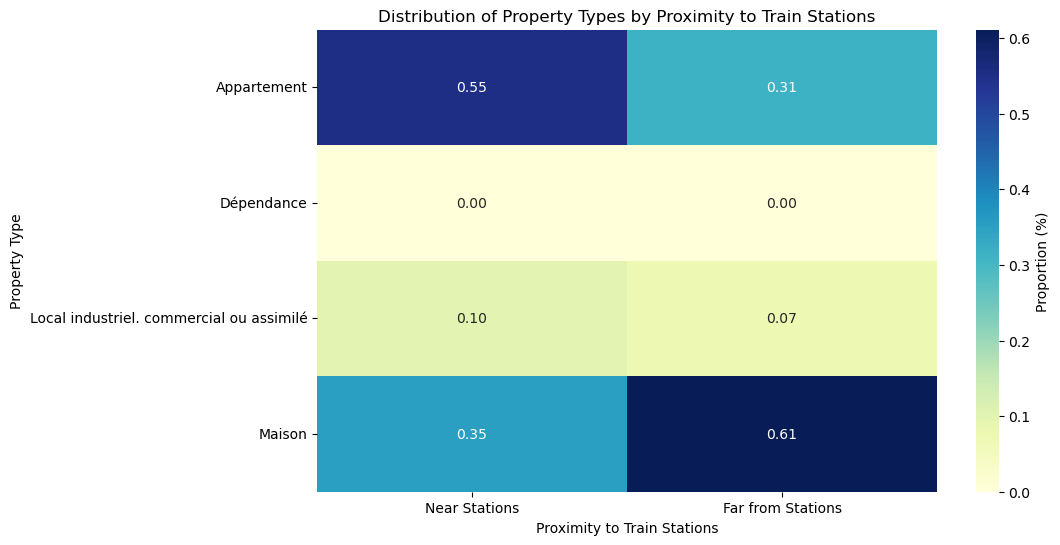

,Type local,Near Stations,Far from Stations
0,Appartement,5.515854e-01,0.313930
1,Dépendance,3.965088e-07,0.000000
2,Local industriel. commercial ou assimilé,9.625727e-02,0.074869
3,Maison,3.521569e-01,0.611201


In [7]:
#### Visualisation : Heatmap ####

import seaborn as sns

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(property_type_distribution, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Proportion (%)'})
plt.title("Distribution of Property Types by Proximity to Train Stations")
plt.xlabel("Proximity to Train Stations")
plt.ylabel("Property Type")
plt.show()

# Display the DataFrame for reference
property_type_distribution.reset_index().rename(columns={"index": "Property Type"})

This heatmap illustrates the distribution of property types (apartments, houses, industrial premises, and outbuildings) based on their proximity to train stations (near or far). Each cell indicates the proportion of properties for each type according to their location.

For example, 55% of properties near train stations are apartments, reflecting strong demand for practical housing in well-connected areas. This type of property is particularly suited for investors targeting urban tenants or young professionals. In contrast, 61% of properties far from train stations are houses, primarily appealing to families seeking larger living spaces.

Industrial or commercial premises account for 10% of properties near train stations, highlighting their attractiveness for activities requiring good connectivity to transportation infrastructure, such as logistics or commerce.

Investing in apartments near train stations or houses in suburban areas offers diverse opportunities to meet varying market needs. This heatmap clearly shows that proximity to train stations influences property types: areas near stations favor apartments in dense urban settings, while distant areas are better suited for houses, ideal for quieter, more spacious living. Investors can optimize their strategy by considering this distribution to maximize returns.

## 4 - Yearly Analysis and Visualization of Real Estate Transactions by Train Station Proximity

In [8]:
# Extract the year of the transactions
df_property_values["Year"] = pd.to_datetime(df_property_values["Date mutation"]).dt.year

# Count transactions by year and proximity to train stations
transactions_by_year = df_property_values.groupby(["Year", "Near_Station"]).size().reset_index(name="Transaction_Count")

# Prepare data for the timeline
transactions_pivot = transactions_by_year.pivot(index="Year", columns="Near_Station", values="Transaction_Count")
transactions_pivot.columns = ["Far from Stations", "Near Stations"]

<Figure size 1200x600 with 0 Axes>

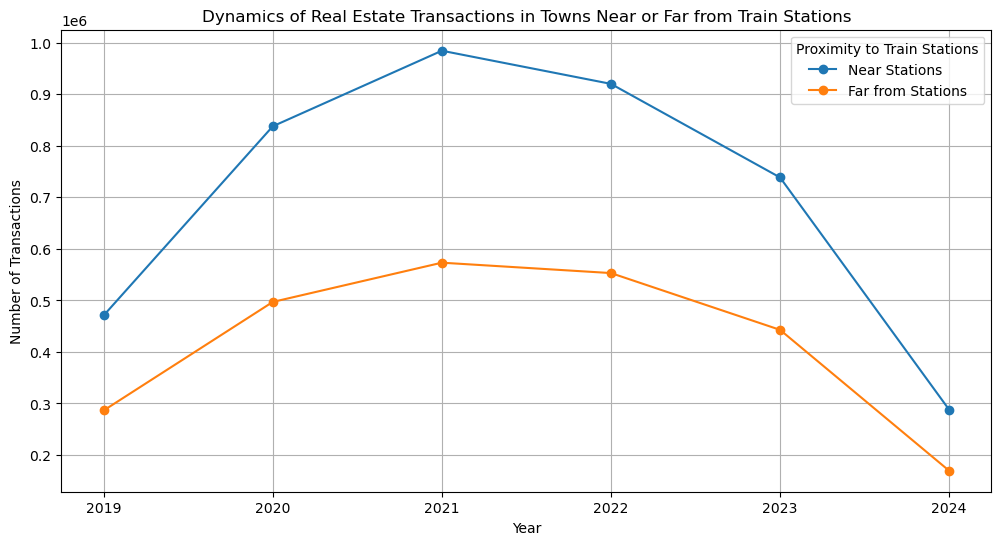

   Year  Near_Station  Transaction_Count
0  2019         False             470835
1  2019          True             286440
2  2020         False             837819
3  2020          True             497003
4  2021         False             984473


In [9]:
#### Visualisation : Timeline ####

plt.figure(figsize=(12, 6))
transactions_pivot.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Dynamics of Real Estate Transactions in Towns Near or Far from Train Stations")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.legend(title="Proximity to Train Stations", labels=["Near Stations", "Far from Stations"])
plt.grid(True)
plt.show()

# Display the prepared data for the timeline
print(transactions_by_year.head())

This timeline illustrates the evolution of real estate transactions between 2019 and 2024, comparing municipalities near train stations to those further away.

Municipalities near train stations experienced a sharp increase in transactions between 2019 and 2021, peaking in 2021. After that year, transactions gradually declined, with a significant drop in 2024. 

Municipalities further from train stations followed a similar trend, with moderate growth until 2021, followed by a slower but steady decline through 2024.

Throughout the period, areas near train stations recorded a higher transaction volume, indicating a sustained preference among buyers and investors for these locations, likely due to their accessibility and attractiveness.

If the decline in transactions is linked to cyclical factors, a market recovery could reverse this trend. In such a case, areas near train stations would likely be the first to benefit, reaffirming their key role in real estate activity.

## 5 - Yearly Analysis and Visualization of Property Value Trends by Station Proximity


In [11]:
# Extract the year from the dates
df_property_values["Year"] = pd.to_datetime(df_property_values["Date mutation"]).dt.year

# Calculate the average property values by year and proximity to train stations
annual_price_by_proximity = df_property_values.groupby(["Year", "Near_Station"])["Valeur fonciere"].mean().reset_index()

# Rename for better clarity
annual_price_by_proximity["Proximity"] = annual_price_by_proximity["Near_Station"].replace(
    {True: "Near Stations", False: "Far from Stations"}
)
annual_price_by_proximity.drop(columns=["Near_Station"], inplace=True)

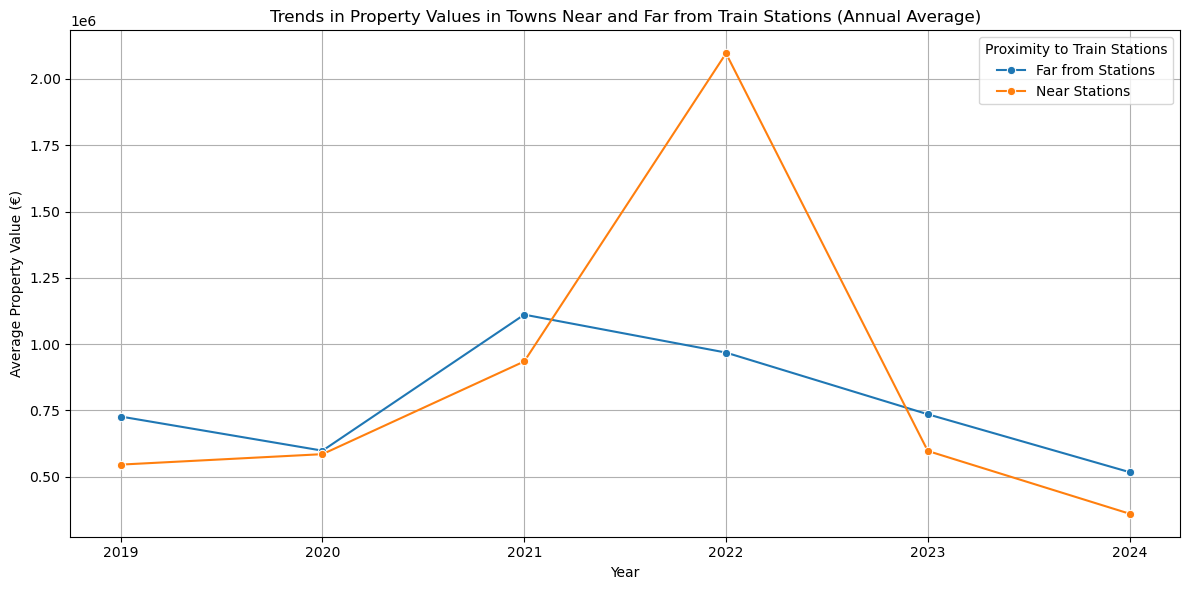

   Year  Valeur fonciere          Proximity
0  2019     7.267453e+05  Far from Stations
1  2019     5.454911e+05      Near Stations
2  2020     5.980427e+05  Far from Stations
3  2020     5.848867e+05      Near Stations
4  2021     1.111102e+06  Far from Stations


In [12]:
#### Visualization of the trend ####

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_price_by_proximity, x="Year", y="Valeur fonciere", hue="Proximity", marker="o")
plt.title("Trends in Property Values in Towns Near and Far from Train Stations (Annual Average)")
plt.xlabel("Year")
plt.ylabel("Average Property Value (€)")
plt.grid(True)
plt.legend(title="Proximity to Train Stations")
plt.tight_layout()
plt.show()

# Display a preview of the processed data
print(annual_price_by_proximity.head())

This line chart illustrates the evolution of average land values between 2019 and 2024, comparing properties near train stations with those farther away.

Properties near train stations experienced significant volatility: after a slight increase between 2019 and 2021 (from €550,000 to €1,200,000), values surged to a dramatic peak of nearly €2,000,000 in 2022, followed by a sharp decline to below €500,000 in 2024. Properties farther from train stations showed a steadier trajectory, with moderate growth until 2021 (from €730,000 to €1,120,000) and a gradual decline to approximately €500,000 by 2024.

This divergence highlights the heightened sensitivity of properties near train stations to economic cycles and shifts in demand. These properties thrive during periods of growth but are susceptible to sharp value drops during market corrections. In contrast, properties farther from train stations offer relative stability, less subject to extreme fluctuations.

By 2024, both categories converge to similar values around €500,000, suggesting a broad market correction. This convergence presents potential investment opportunities, particularly in properties near train stations, if their rental demand remains strong.

Properties near train stations offer substantial growth potential but require risk mitigation due to their volatility. Properties farther from train stations provide stability, ideal for long-term, risk-averse investments.

## 6 - Conclusion 

Invest in properties near train stations to take advantage of high demand and good accessibility. These areas are great for projects like apartments, which attract professionals and tenants. However, they can be risky because prices are more volatile.

Suburban properties are more affordable and stable. They are better for long-term investments, especially for families looking for bigger houses in quieter areas.

For the best results, mix investments in busy areas near train stations with stable options farther away. Keep an eye on market trends—if the market recovers, areas near train stations will likely grow first. You can also consider industrial or commercial properties near stations, as they benefit from good transport links.